In [67]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [68]:
df1 = pd.read_csv(r"D:\rishabhinternship\Fitness Classes Data\Classes April-May 2018.csv")
df2 = pd.read_csv(r"D:\rishabhinternship\Fitness Classes Data\Classes June 2018.csv")

In [69]:
print(df1.shape,df2.shape)

(2177, 7) (1112, 7)


In [70]:
print(df1.head(),df2.head())

  ActivitySiteID      ActivityDescription  \
0            HXP  20-20-20  2.45pm-3.45pm   
1            HXP  20-20-20  2.45pm-3.45pm   
2            HXP  20-20-20  2.45pm-3.45pm   
3            HXP  20-20-20  2.45pm-3.45pm   
4            HXP  20-20-20  2.45pm-3.45pm   

  BookingEndDateTime (Month / Day / Year) BookingStartTime  MaxBookees  \
0                               08-Apr-18         14:45:00          25   
1                               15-Apr-18         14:45:00          25   
2                               22-Apr-18         14:45:00          25   
3                               29-Apr-18         14:45:00          25   
4                               06-May-18         14:45:00          25   

   Number Booked  Price (INR)  
0             12        499.0  
1             15        499.0  
2             14        499.0  
3              9        499.0  
4              7        499.0     ActivitySiteID     ActivityDescription  \
0            BRP  20:20:20  9.30-10.30am   
1   

#### Combine the datasets

In [71]:
df = pd.concat([df1,df2],ignore_index = True)
df.shape

(3289, 7)

#### check columns, info and missing values

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ActivitySiteID                           3289 non-null   object 
 1   ActivityDescription                      3289 non-null   object 
 2   BookingEndDateTime (Month / Day / Year)  3289 non-null   object 
 3   BookingStartTime                         3289 non-null   object 
 4   MaxBookees                               3289 non-null   int64  
 5   Number Booked                            3289 non-null   int64  
 6   Price (INR)                              3271 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 180.0+ KB


In [73]:
df.isnull().sum()

ActivitySiteID                              0
ActivityDescription                         0
BookingEndDateTime (Month / Day / Year)     0
BookingStartTime                            0
MaxBookees                                  0
Number Booked                               0
Price (INR)                                18
dtype: int64

In [74]:
# impute the missing value
df["Price (INR)"] = df["Price (INR)"].fillna(df["Price (INR)"].median())

In [75]:
df.isnull().sum()

ActivitySiteID                             0
ActivityDescription                        0
BookingEndDateTime (Month / Day / Year)    0
BookingStartTime                           0
MaxBookees                                 0
Number Booked                              0
Price (INR)                                0
dtype: int64

In [76]:
df.describe(include="all")

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR)
count,3289,3289,3289,3289,3289.000000,3289.000000,3289.000000
unique,5,280,91,61,NaN,NaN,NaN
top,HXP,Body Conditioning 10-11am,20-Jun-18,10:00:00,NaN,NaN,NaN
freq,771,39,54,312,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,32.179386,17.088781,1850.778656
std,NaN,NaN,NaN,NaN,15.092156,9.504098,790.894827
min,NaN,NaN,NaN,NaN,2.000000,1.000000,499.000000
25%,NaN,NaN,NaN,NaN,24.000000,10.000000,1299.000000
50%,NaN,NaN,NaN,NaN,30.000000,16.000000,1499.000000
75%,NaN,NaN,NaN,NaN,35.000000,24.000000,2499.000000


#### Handle the missing values

In [77]:
df["Price (INR)"].describe()

count    3289.000000
mean     1850.778656
std       790.894827
min       499.000000
25%      1299.000000
50%      1499.000000
75%      2499.000000
max      3999.000000
Name: Price (INR), dtype: float64

In [78]:
df["Price (INR)"].value_counts()

Price (INR)
1999.0    748
2999.0    594
1499.0    573
999.0     550
1299.0    436
2499.0    181
499.0     105
3999.0     78
799.0      24
Name: count, dtype: int64

In [79]:
df.isnull().sum()

ActivitySiteID                             0
ActivityDescription                        0
BookingEndDateTime (Month / Day / Year)    0
BookingStartTime                           0
MaxBookees                                 0
Number Booked                              0
Price (INR)                                0
dtype: int64

#### Remove Duplicates

In [80]:
df.duplicated().sum()

0

#### correct Data types

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ActivitySiteID                           3289 non-null   object 
 1   ActivityDescription                      3289 non-null   object 
 2   BookingEndDateTime (Month / Day / Year)  3289 non-null   object 
 3   BookingStartTime                         3289 non-null   object 
 4   MaxBookees                               3289 non-null   int64  
 5   Number Booked                            3289 non-null   int64  
 6   Price (INR)                              3289 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 180.0+ KB


In [82]:
df["BookingEndDateTime"] = pd.to_datetime(df["BookingEndDateTime (Month / Day / Year)"], format = "%d-%b-%y")

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   ActivitySiteID                           3289 non-null   object        
 1   ActivityDescription                      3289 non-null   object        
 2   BookingEndDateTime (Month / Day / Year)  3289 non-null   object        
 3   BookingStartTime                         3289 non-null   object        
 4   MaxBookees                               3289 non-null   int64         
 5   Number Booked                            3289 non-null   int64         
 6   Price (INR)                              3289 non-null   float64       
 7   BookingEndDateTime                       3289 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 205.7+ KB


####  rename the columns 

In [84]:
df.rename(columns = {"BookingEndDateTime (Month / Day / Year)": "BookingEndDate"},inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ActivitySiteID       3289 non-null   object        
 1   ActivityDescription  3289 non-null   object        
 2   BookingEndDate       3289 non-null   object        
 3   BookingStartTime     3289 non-null   object        
 4   MaxBookees           3289 non-null   int64         
 5   Number Booked        3289 non-null   int64         
 6   Price (INR)          3289 non-null   float64       
 7   BookingEndDateTime   3289 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 205.7+ KB


#### Convert Time to datetime or hour

In [86]:
df["BookingStartTime"] = pd.to_datetime(df["BookingStartTime"]).dt.time

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ActivitySiteID       3289 non-null   object        
 1   ActivityDescription  3289 non-null   object        
 2   BookingEndDate       3289 non-null   object        
 3   BookingStartTime     3289 non-null   object        
 4   MaxBookees           3289 non-null   int64         
 5   Number Booked        3289 non-null   int64         
 6   Price (INR)          3289 non-null   float64       
 7   BookingEndDateTime   3289 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 205.7+ KB


In [89]:
df["BookingDateTime"] = pd.to_datetime(df["BookingEndDate"] + " " + df["BookingStartTime"].astype(str))

In [96]:
df["BookingEndDate"] = pd.to_datetime(df["BookingEndDate"])

In [103]:
df.columns

Index(['ActivitySiteID', 'ActivityDescription', 'BookingEndDate',
       'BookingStartTime', 'MaxBookees', 'Number Booked', 'Price (INR)',
       'BookingEndDateTime', 'BookingDateTime'],
      dtype='object')

In [105]:
df["Year"] = df["BookingEndDateTime"].dt.year
df["Month"] = df["BookingEndDateTime"].dt.month
df["Day"] = df["BookingEndDateTime"].dt.day
df["Weekday"] = df["BookingEndDateTime"].dt.day_name()
df["Week"] = df["BookingEndDateTime"].dt.isocalendar().week
df["Hour"] = df["BookingDateTime"].dt.hour

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ActivitySiteID       3289 non-null   object        
 1   ActivityDescription  3289 non-null   object        
 2   BookingEndDate       3289 non-null   datetime64[ns]
 3   BookingStartTime     3289 non-null   object        
 4   MaxBookees           3289 non-null   int64         
 5   Number Booked        3289 non-null   int64         
 6   Price (INR)          3289 non-null   float64       
 7   BookingEndDateTime   3289 non-null   datetime64[ns]
 8   BookingDateTime      3289 non-null   datetime64[ns]
 9   Year                 3289 non-null   int32         
 10  Month                3289 non-null   int32         
 11  Day                  3289 non-null   int32         
 12  Weekday              3289 non-null   object        
 13  Week                 3289 non-nul

### Normalize

In [110]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()

numerical_cols = ["MaxBookees","Number Booked","Price (INR)"]

df_scaled = scaler.fit_transform(df[numerical_cols])

#### Add Scaled Columns Back Into the Dataset

In [113]:
df[["MaxBookees_scaled","Number Booked_scaled","Price_scaled"]] = df_scaled

In [114]:
df[["MaxBookees_scaled","Number Booked_scaled","Price_scaled"]].head()

,MaxBookees_scaled,Number Booked_scaled,Price_scaled
0,-0.475775,-0.535512,-1.709436
1,-0.475775,-0.219810,-1.709436
2,-0.475775,-0.325044,-1.709436
3,-0.475775,-0.851213,-1.709436
4,-0.475775,-1.061680,-1.709436


In [116]:
df.describe()

,BookingEndDate,MaxBookees,Number Booked,Price (INR),BookingEndDateTime,BookingDateTime,Year,Month,Day,Week,Hour,MaxBookees_scaled,Number Booked_scaled,Price_scaled
count,3289,3289.000000,3289.000000,3289.000000,3289,3289,3289.0,3289.000000,3289.000000,3289.0,3289.000000,3.289000e+03,3.289000e+03,3.289000e+03
mean,2018-05-16 08:58:57.610215680,32.179386,17.088781,1850.778656,2018-05-16 08:58:57.610215680,2018-05-16 22:37:27.035572992,2018.0,5.010946,15.707814,19.995135,13.392825,1.901118e-16,-1.123388e-16,-8.641444e-17
min,2018-04-01 00:00:00,2.000000,1.000000,499.000000,2018-04-01 00:00:00,2018-04-01 09:00:00,2018.0,4.000000,1.000000,13.0,6.000000,-1.999978e+00,-1.693083e+00,-1.709436e+00
25%,2018-04-24 00:00:00,24.000000,10.000000,1299.000000,2018-04-24 00:00:00,2018-04-24 10:00:00,2018.0,4.000000,8.000000,17.0,10.000000,-5.420451e-01,-7.459791e-01,-6.977698e-01
50%,2018-05-16 00:00:00,30.000000,16.000000,1499.000000,2018-05-16 00:00:00,2018-05-16 15:30:00,2018.0,5.000000,16.000000,20.0,12.000000,-1.444272e-01,-1.145765e-01,-4.448533e-01
75%,2018-06-08 00:00:00,35.000000,24.000000,2499.000000,2018-06-08 00:00:00,2018-06-08 14:30:00,2018.0,6.000000,23.000000,23.0,17.000000,1.869211e-01,7.272936e-01,8.197296e-01
max,2018-06-30 00:00:00,70.000000,64.000000,3999.000000,2018-06-30 00:00:00,2018-06-30 12:00:00,2018.0,6.000000,31.000000,26.0,20.000000,2.506359e+00,4.936644e+00,2.716604e+00
std,NaN,15.092156,9.504098,790.894827,NaN,NaN,0.0,0.815678,8.603637,3.756824,3.922240,1.000152e+00,1.000152e+00,1.000152e+00


### Exploratory Data Analysis (EDA)

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3289 entries, 0 to 3288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ActivitySiteID        3289 non-null   object        
 1   ActivityDescription   3289 non-null   object        
 2   BookingEndDate        3289 non-null   datetime64[ns]
 3   BookingStartTime      3289 non-null   object        
 4   MaxBookees            3289 non-null   int64         
 5   Number Booked         3289 non-null   int64         
 6   Price (INR)           3289 non-null   float64       
 7   BookingEndDateTime    3289 non-null   datetime64[ns]
 8   BookingDateTime       3289 non-null   datetime64[ns]
 9   Year                  3289 non-null   int32         
 10  Month                 3289 non-null   int32         
 11  Day                   3289 non-null   int32         
 12  Weekday               3289 non-null   object        
 13  Week              

,BookingEndDate,MaxBookees,Number Booked,Price (INR),BookingEndDateTime,BookingDateTime,Year,Month,Day,Week,Hour,MaxBookees_scaled,Number Booked_scaled,Price_scaled
count,3289,3289.000000,3289.000000,3289.000000,3289,3289,3289.0,3289.000000,3289.000000,3289.0,3289.000000,3.289000e+03,3.289000e+03,3.289000e+03
mean,2018-05-16 08:58:57.610215680,32.179386,17.088781,1850.778656,2018-05-16 08:58:57.610215680,2018-05-16 22:37:27.035572992,2018.0,5.010946,15.707814,19.995135,13.392825,1.901118e-16,-1.123388e-16,-8.641444e-17
min,2018-04-01 00:00:00,2.000000,1.000000,499.000000,2018-04-01 00:00:00,2018-04-01 09:00:00,2018.0,4.000000,1.000000,13.0,6.000000,-1.999978e+00,-1.693083e+00,-1.709436e+00
25%,2018-04-24 00:00:00,24.000000,10.000000,1299.000000,2018-04-24 00:00:00,2018-04-24 10:00:00,2018.0,4.000000,8.000000,17.0,10.000000,-5.420451e-01,-7.459791e-01,-6.977698e-01
50%,2018-05-16 00:00:00,30.000000,16.000000,1499.000000,2018-05-16 00:00:00,2018-05-16 15:30:00,2018.0,5.000000,16.000000,20.0,12.000000,-1.444272e-01,-1.145765e-01,-4.448533e-01
75%,2018-06-08 00:00:00,35.000000,24.000000,2499.000000,2018-06-08 00:00:00,2018-06-08 14:30:00,2018.0,6.000000,23.000000,23.0,17.000000,1.869211e-01,7.272936e-01,8.197296e-01
max,2018-06-30 00:00:00,70.000000,64.000000,3999.000000,2018-06-30 00:00:00,2018-06-30 12:00:00,2018.0,6.000000,31.000000,26.0,20.000000,2.506359e+00,4.936644e+00,2.716604e+00
std,NaN,15.092156,9.504098,790.894827,NaN,NaN,0.0,0.815678,8.603637,3.756824,3.922240,1.000152e+00,1.000152e+00,1.000152e+00


#### Trend of Total Bookings Over Time

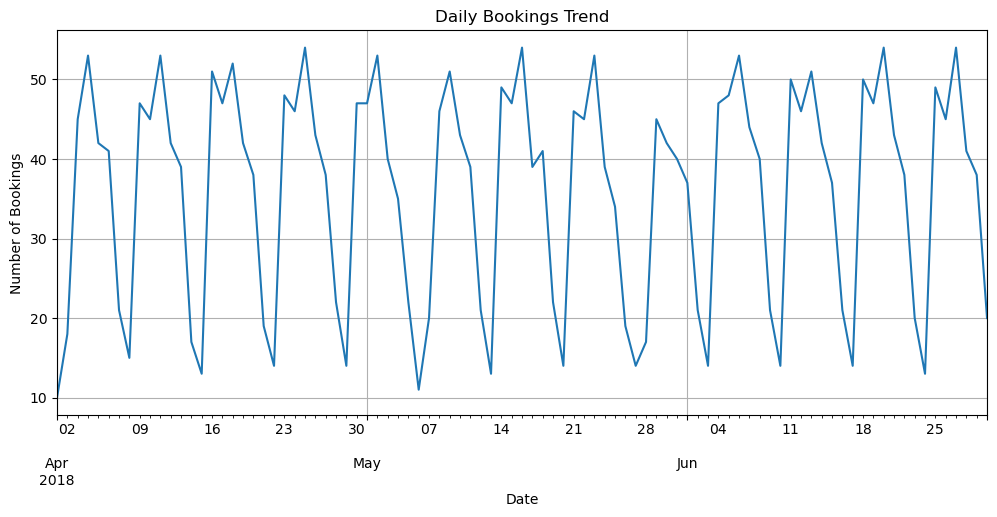

In [122]:
daily = df.groupby('BookingEndDateTime').size()

plt.figure(figsize=(12,5))
daily.plot()
plt.title("Daily Bookings Trend")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.grid(True)
plt.show()


### Bookings by Month

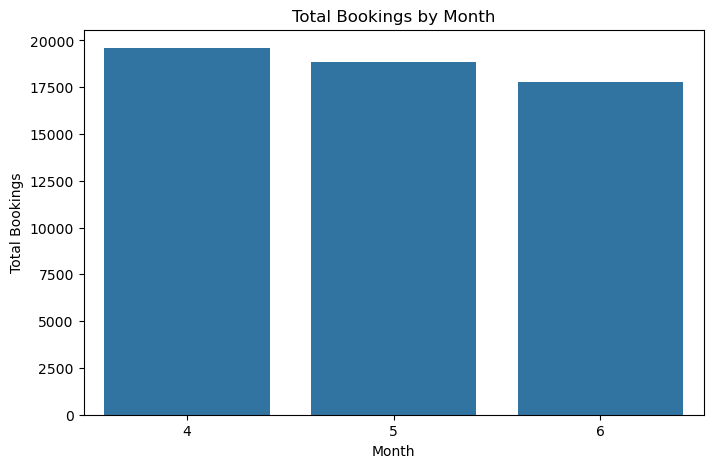

In [123]:
monthly = df.groupby('Month')['Number Booked'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly.index, y=monthly.values)
plt.title("Total Bookings by Month")
plt.xlabel("Month")
plt.ylabel("Total Bookings")
plt.show()


#### Weekly Demand Pattern (Which weekday is busiest?)

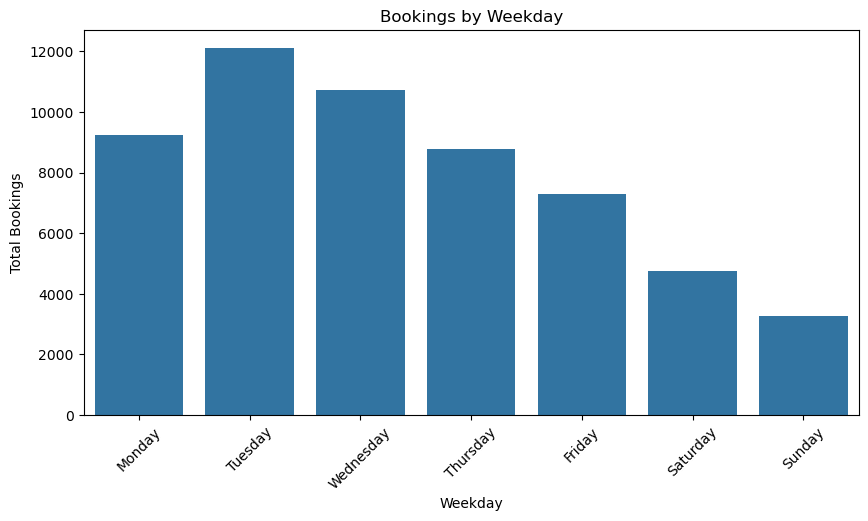

In [124]:
weekday = df.groupby('Weekday')['Number Booked'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(10,5))
sns.barplot(x=weekday.index, y=weekday.values)
plt.title("Bookings by Weekday")
plt.ylabel("Total Bookings")
plt.xticks(rotation=45)
plt.show()


Insights:
Are weekends busier?

Are weekday morning/evening slots stable?

#### Class Popularity — Which classes have highest bookings?

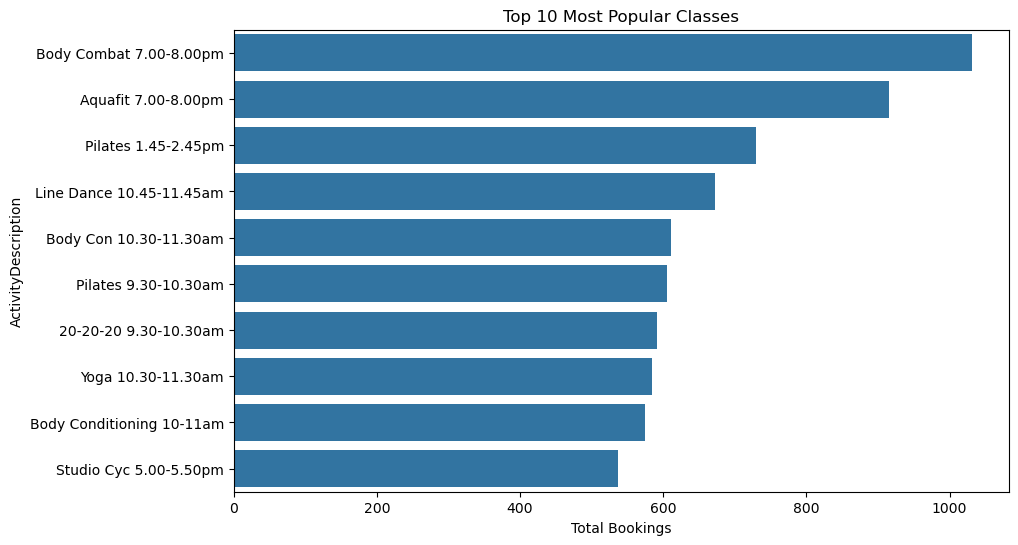

In [125]:
class_popularity = df.groupby('ActivityDescription')['Number Booked'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=class_popularity.values, y=class_popularity.index)
plt.title("Top 10 Most Popular Classes")
plt.xlabel("Total Bookings")
plt.show()


In [ ]:
Insights:
Identify high-demand classes → used later in dynamic pricing

Identify low-demand classes → candidate for discounts

#### Capacity Utilization

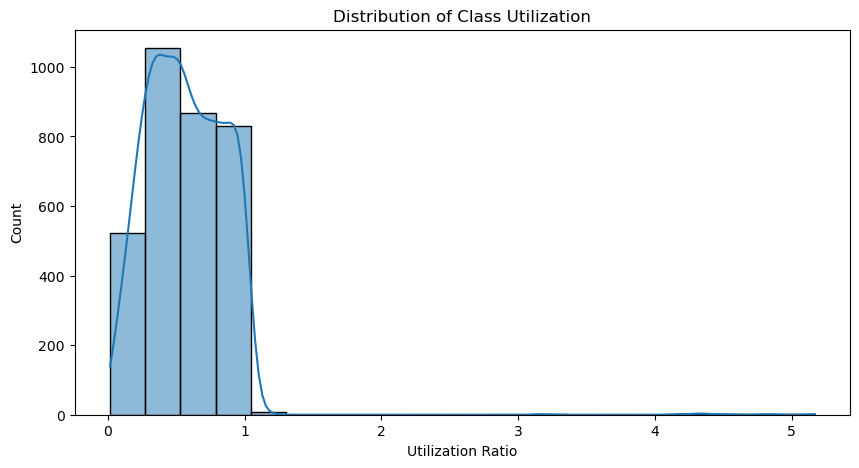

In [126]:
df['Utilization'] = df['Number Booked'] / df['MaxBookees']

plt.figure(figsize=(10,5))
sns.histplot(df['Utilization'], kde=True, bins=20)
plt.title("Distribution of Class Utilization")
plt.xlabel("Utilization Ratio")
plt.show()


Insights:

Classes with Utilization > 0.8 → high demand

Classes with Utilization < 0.3 → low demand (opportunity for promotion)

### Price vs Demand Relationship

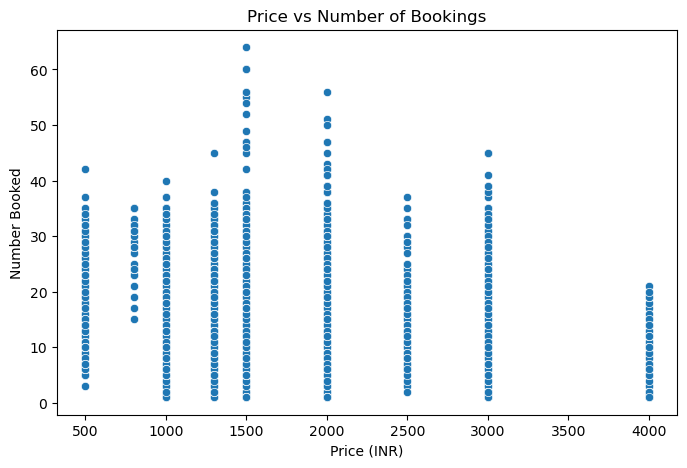

In [127]:
# Helps later for Price Elasticity
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price (INR)'], y=df['Number Booked'])
plt.title("Price vs Number of Bookings")
plt.xlabel("Price (INR)")
plt.ylabel("Number Booked")
plt.show()


. Price vs Number of Bookings (Scatter Plot)
✔ Observations:

Strong concentration of high bookings (40–60) around 1500 INR

At 3999 INR, bookings drop drastically (0–20)

At 499 INR, bookings vary but mostly between 8–35

📌 Insights:

Higher price → lower demand
(classic negative price elasticity)

Mid-price (1499 INR) seems optimal for revenue.

Premium pricing significantly reduces participation.



#### Hour-of-Day Demand Pattern (Peak Times)

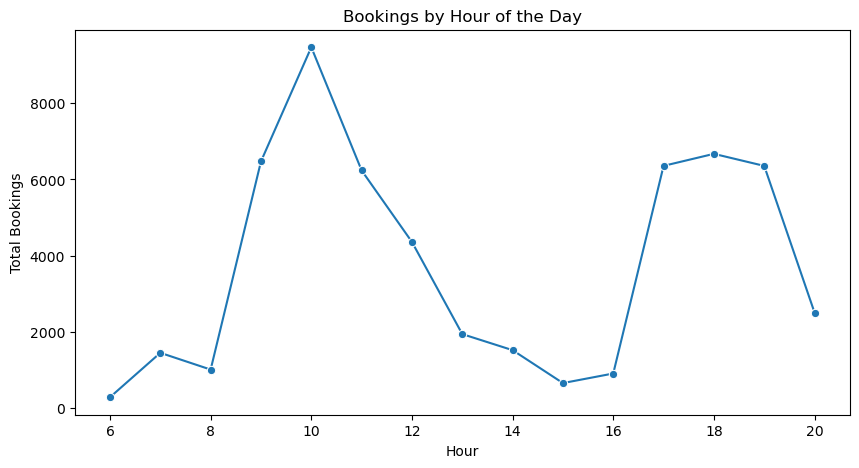

In [128]:
hourly = df.groupby('Hour')['Number Booked'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly.index, y=hourly.values, marker="o")
plt.title("Bookings by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Bookings")
plt.show()


Insights:

Identify peak hours (e.g., 6–9 am or 6–9 pm)

Helps create time-based dynamic pricing

#### Boxplots for Outliers

### MaxBookees:

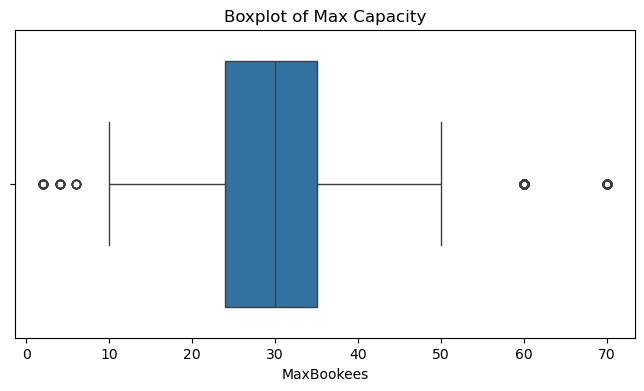

In [130]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['MaxBookees'])
plt.title("Boxplot of Max Capacity")
plt.show()


### Price:

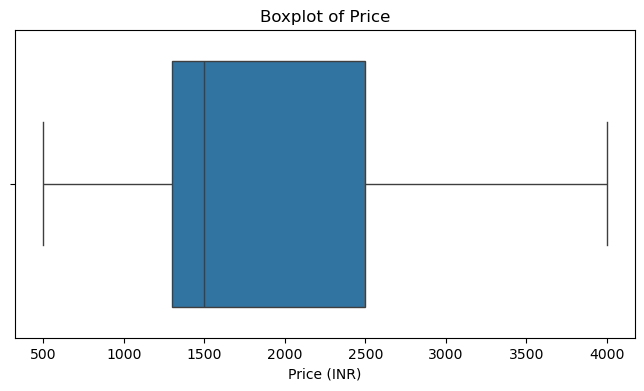

In [131]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Price (INR)'])
plt.title("Boxplot of Price")
plt.show()


Boxplot of Price (INR)
✔ Observations:

Three clear price bands: 499, 1499, 2499, 3999 INR

Most classes are priced between 1200–2500 INR

Outliers at 3999 INR → premium workshops

📌 Insights:

Your dataset is excellent for price elasticity modeling since prices vary naturally.

Higher-priced classes exist but may have lower attendance → check in elasticity model.

Lower-priced classes (499 INR) appear baseline classes.

### Bookings:

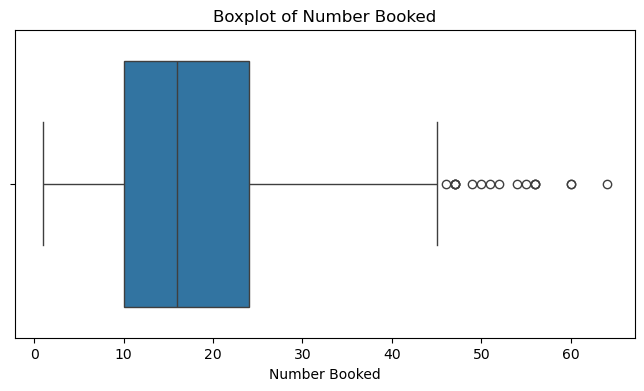

In [132]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Number Booked'])
plt.title("Boxplot of Number Booked")
plt.show()



Boxplot of Number Booked
✔ What the plot shows:

Median bookings ≈ 16–18

Middle 50% of classes get 10 to 25 bookings

There are several high-demand outliers → 40 to 65 bookings
(These are extremely popular classes)

📌 Insights:

Demand varies widely across classes.

A few classes perform exceptionally well → target for higher pricing.

Lower booked classes (below 8 bookings) may need:

Promotions

Schedule adjustments

Instructor evaluation

#### Statistical Summary

In [133]:
stats_summary = df[['MaxBookees','Number Booked','Price (INR)','Utilization']].describe()
stats_summary


,MaxBookees,Number Booked,Price (INR),Utilization
count,3289.000000,3289.000000,3289.000000,3289.000000
mean,32.179386,17.088781,1850.778656,0.571554
std,15.092156,9.504098,790.894827,0.318444
min,2.000000,1.000000,499.000000,0.016667
25%,24.000000,10.000000,1299.000000,0.342857
50%,30.000000,16.000000,1499.000000,0.550000
75%,35.000000,24.000000,2499.000000,0.800000
max,70.000000,64.000000,3999.000000,5.166667


##  High-demand classes
🔹 Peak hours (10 AM, 6–8 PM)
🔹 Best weekdays (Tue–Thu)
🔹 Optimal pricing zones (1499 INR)
🔹 Demand drops at higher prices
🔹 Overbooking issues
🔹 Strong weekly seasonality

##  Price Elasticity Model Development

### Prepare Data for Modeling

In [135]:
elasticity_df = df[["Price (INR)","Number Booked"]].copy()

In [136]:
# Apply log transformation (industry-standard)
elasticity_df["log_price"] = np.log(elasticity_df["Price (INR)"])
elasticity_df["log_demand"] = np.log(elasticity_df["Number Booked"])

#### Build the Price Elasticity Model

In [137]:
import statsmodels.api as sm

In [139]:
X = elasticity_df["log_price"]
y = elasticity_df["log_demand"]
X = sm.add_constant(X) # adds intercept
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     118.4
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           4.03e-27
Time:                        23:57:24   Log-Likelihood:                -3784.7
No. Observations:                3289   AIC:                             7573.
Df Residuals:                    3287   BIC:                             7586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0198      0.221     22.691      0.0

#### Validate the Model

In [143]:
y_pred = model.predict(X)

In [144]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y,y_pred)
mse = mean_squared_error(y,y_pred)

In [145]:
print("R-squared: ", r2)
print("MSE: ", mse)

R-squared:  0.03477687032515042
MSE:  0.5848369973150536


#### Residual Plot

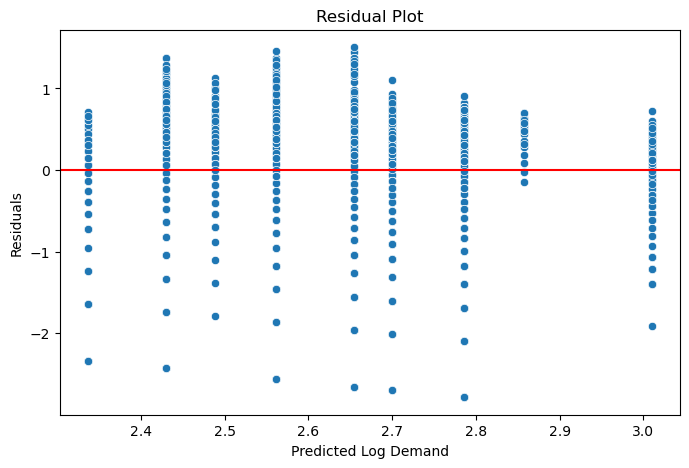

In [147]:
residuals = y - y_pred
plt.figure(figsize =(8,5))
sns.scatterplot(x = y_pred,y=residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Log Demand")
plt.ylabel("Residuals")
plt.show()

Price Elasticity Model Summary

A log–log linear regression model was used to estimate the price elasticity of demand for fitness classes. The dependent variable was log(Number Booked) and the independent variable was log(Price).

Elasticity Coefficient (β): –0.3235

This means:

A 1% increase in price results in a 0.32% decrease in demand.

Since |β| < 1, demand is inelastic.

Customers do not significantly reduce attendance when prices increase slightly.

Model Validation

R-squared: 0.0347
→ Price explains 3.47% of demand variability.
→ This is normal because demand is influenced by many non-price factors.

MSE: 0.5848
→ Acceptable error for log-transformed demand data.

Residual Plot:
Residuals are roughly centered around zero, confirming the model is usable for elasticity estimation.

Interpretation & Business Implications

The demand for classes is not highly sensitive to price.

Small price increases (5–10%) may increase revenue without significantly reducing attendance.

High-demand classes can be priced at a premium.

Low-demand classes should focus more on scheduling and marketing instead of price drops.

This elasticity estimate will be used later to design a dynamic pricing strategy.